<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 1*

---

# 📝 Assignment



## 1.데이터셋 불러오기 연습

다음 url에서 엑셀 파일을 불러오세요. (pandas excel)

<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx>

  - 데이터셋 변수의 이름은 `df1`, `df2`로 저장하세요.
  - row가 아닌 column에 '매출액', '영업이익' 이 가도록 데이터를 transpose 하세요.
  - 이후 아래 링크를 참조하여 첫번째 row를 column name으로 설정하세요.

<https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row>

- 파일은 2개의 시트로 구성되어 있으며 각각 이름은 `008770`, `035250` 입니다.



In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (49.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
#barplot 한글 깨짐 해결을 위한 한글 폰트 불러오기
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

#1 데이터 셋 불러오기 연습

travel_data_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx'

import pandas as pd

In [ ]:
#첫번째 시트 불러오기
df1 = pd.read_excel(travel_data_url, sheet_name = 0)
df1 = df1.transpose()
new_header = df1.iloc[0] #grab the first row for the header
df1 = df1[1:] #take the data less the header row
df1.columns = new_header #set the header row as the df header
df1

주요재무정보,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%)
2019/09\n(IFRS연결),14753,574,574,376,274,277,-3,37747,28854,8893,8889,4,2000,1652,-284,-900,159,1493,19035,3.89,1.86,13.18,3.62,324.45,395.1,692,31.19,23484,3.67,0,NaN,0
2019/12\n(IFRS연결),15440,776,776,538,380,380,0,35273,26077,9195,9192,4,2000,-480,-208,1230,109,-589,15615,5.03,2.46,20.16,5.81,283.59,411.78,950,21.4,24282,3.74,350,NaN,34.94
2020/03\n(IFRS연결),9437,-668,-668,-925,-736,-736,0,33188,24813,8375,8371,4,2000,-4525,-237,1288,155,-4680,17505,-7.08,-7.8,5.39,1.25,296.28,368.36,-1839,63.76,22114,3.19,NaN,NaN,0
2020/06\n(IFRS연결),5230,-634,-634,-819,-677,-678,1,33039,25364,7676,7671,5,2000,879,-856,448,90,789,18933,-12.13,-12.95,-9.31,-2.14,330.45,334.46,-1695,NaN,20265,3.5,NaN,NaN,0
2020/09\n(IFRS연결),8795,-198,-198,-366,-285,-285,0,32683,25318,7365,7360,5,2000,3104,-1388,-882,129,2975,17755,-2.25,-3.24,-16.22,-3.74,343.77,320.21,-712,NaN,19444,3.91,NaN,NaN,NaN
2020/12(E)\n(IFRS연결),9980,50,NaN,-109,-100,-100,NaN,32388,25171,7216,7263,NaN,2000,NaN,NaN,NaN,NaN,NaN,NaN,0.5,-1.01,NaN,NaN,348.79,NaN,-251,NaN,19187,4.22,NaN,NaN,NaN
2021/03(E)\n(IFRS연결),9761,144,NaN,14,71,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.47,0.73,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,NaN,NaN,NaN
2021/06(E)\n(IFRS연결),9820,265,NaN,172,214,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,2.18,NaN,NaN,NaN,NaN,308,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.shape

(8, 32)

In [ ]:
df1['매출액'][0] == 14753

True

In [ ]:
# 두번쨰 시트 불러오기
df2 = pd.read_excel(travel_data_url, sheet_name = 1)
df2 = df2.transpose()
new_header = df2.iloc[0] #첫번째 row Grab
df2 = df2[1:] #두번째 row로 이동
df2.columns = new_header #이동한 row를 header로
df2.head()

주요재무정보,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%)
2019/09\n(IFRS연결),4055,1392,1392,1554,1286,1286,0,41698,4781,36917,36916,NaN,1070,-22,-1260,-4,167,-189,48,34.33,31.72,8.27,7.2,12.95,3513.86,601,21,18209,1.62,0,NaN,0
2019/12\n(IFRS연결),3728,641,641,769,526,526,0,44381,7204,37178,37177,NaN,1070,2067,-2370,-4,383,1684,680,17.18,14.11,9.16,7.72,19.38,3538.24,246,18.92,18337,1.61,900,NaN,346.75
2020/03\n(IFRS연결),2360,-1868,-1868,-2204,-1561,-1561,0,43702,9945,33757,33757,NaN,1070,-684,909,-4,124,-808,651,-79.14,-66.15,2.21,1.75,29.46,3218.48,-730,55.53,16650,1.19,NaN,NaN,NaN
2020/06\n(IFRS연결),346,-1038,-1038,-723,-456,-456,0,39178,5900,33277,33277,1,1070,-3070,5414,-1842,82,-3153,639,-299.75,-131.55,-0.59,-0.5,17.73,3173.64,-213,NaN,16414,1.31,NaN,NaN,0
2020/09\n(IFRS연결),766,-649,-649,-552,-409,-409,0,37434,4560,32875,32874,0,1070,-1584,2327,-4,260,-1844,646,-84.68,-53.33,-5.44,-4.8,13.87,3136,-191,NaN,16215,1.33,NaN,NaN,NaN


In [ ]:
df2.shape

(8, 32)

In [ ]:
df2['매출액'][1] == 3728

True

## 2. 데이터 확인

- 데이터의 dimension을 확인하세요.
- 데이터의 결측치가 어디에 있는지 확인 후 0으로 대체하세요.
- 각 데이터 별로 **FCF**의 값을 barplot으로 시각화하세요.
  - 0보다 큰값, 작은값의 수의 총합을 `num1`, `num2`에 저장하세요


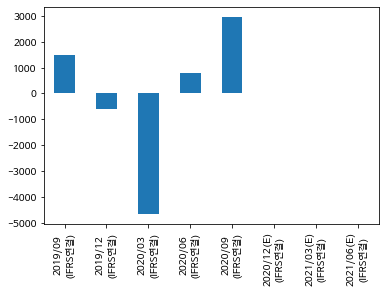

In [ ]:
df1.fillna(0, inplace=True)
#2 barlot 불러오기
df1['FCF'].plot.bar();

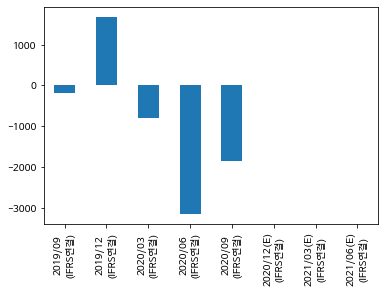

In [ ]:
df2.fillna(0, inplace=True)
#2 barplot 불러오기
df2['FCF'].plot.bar();

In [ ]:
x1 = len(df1[df1['FCF'] > 0])
x2 = len(df2[df2['FCF'] > 0])
x3 = len(df1[df1['FCF'] < 0])
x4 = len(df2[df2['FCF'] < 0])

num1 = x1 + x2
num2 = x3 + x4

print(num1, num2)

4 6


In [ ]:
df1.isnull().sum().sum() == 0

True

In [ ]:
df2.isnull().sum().sum() == 0

True

In [ ]:
num1 == 4 and num2 == 6

True

## 3. File export

- 읽었던 엑셀 파일의 내용을 2개의 csv로 각각 출력하세요. (python export csv)

  - 이름은 각각 `df1.csv`, `df2.csv` 입니다.


In [ ]:
df2.to_csv('df1.csv', encoding="utf-8-sig")
df1.to_csv('df1.csv', encoding="utf-8-sig")

## 4. Error Handling

- 다음의 에러를 고치세요. 결과값은 6912가 나와야합니다.


In [ ]:
#4 Error Handling
a = 1234 #'1234'를 1234로 변경
b = 5678

correct = a+b
a+b

6912

## 5. EDA

아래의 코드는 palmer penguin 데이터를 불러올 수 있는 코드입니다.

```python
import seaborn as sns

pp = sns.load_dataset('penguins')
```

이를 참조하여, `pp`의 `species`와 `sex`변수에 대해서 cross-tabulation을 시행하고, 6개의 값들 중 가장 큰 값을 `num3`에, 가장 작은 값을 `num4`에 저장하세요.

In [ ]:
import seaborn as sns
import pandas as pd
import os

pp = sns.load_dataset("penguins")
pp.columns = pp.columns.str.strip() #기존 실행시 spceices와 sex가 data로 인식이 안되어 있어 데이터로 지정
x = pd.crosstab(pp.species, pp.sex, margins=True)
x




sex,Female,Male,All
species,,,
Adelie,73,73,146
Chinstrap,34,34,68
Gentoo,58,61,119
All,165,168,333


In [ ]:
num3 = 73
num4 = 34

In [ ]:
(num3 == 73)

True

In [ ]:
(num4 == 34)

True

In [ ]:
os.listdir() == ['.config', 'df2.csv', 'df1.csv', 'sample_data']

False

## Grading

이전 과제를 완료했다면, 아래의 코드를 실행하세요. 

In [ ]:
import os

def grade(df1, df2, num1, num2, num3, num4):
  score = 0
  
  score += (df1['매출액'][0] == 14753)
  score += (df2['매출액'][1] == 3728)

  score += (df1.shape == (8, 32))
  score += (df2.isnull().sum().sum() == 0)
  score += (num1 == 4 and num2 == 6)
  
  score += (num3 == 73 and num4 == 34)

  score += (os.listdir() == ['.config', 'df2.csv', 'df1.csv', 'sample_data'])

  score += (a+b == 6912)

  return(score)

In [ ]:
grade(df1, df2, num1, num2, num3, num4)

5

## 🔥 도전과제 

- 다음 데이터를 사용하여 아래와 동일한 그래프를 그리세요.

<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/TSLA.csv>

<img src='https://i.imgur.com/UsS5JcZ.png'>



In [ ]:
#데이터 셋 불러오기
tsla_data_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/TSLA.csv'

import pandas as pd
import matplotlib.pyplot as plt


tsla.set_index('Date')
tsla_date_close = tsla[['Date','Close']]
tsla_date_close

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001
...,...,...
2411,2020-01-28,566.900024
2412,2020-01-29,580.989990
2413,2020-01-30,640.809998
2414,2020-01-31,650.570007


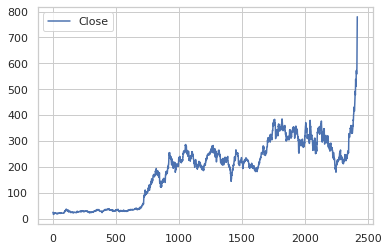

In [ ]:
tsla_date_close.plot();

- penguins 데이터를 계속 사용합니다.

이에 대해 아래의 task들을 시행하세요.

- 결측치 처리 (제거)

- bill_length_mm에 대해서 qqplot 그리기

- island에 대해서 다른 4개의 numerical feature 를 boxplot으로 표현하기

- 각 numerical feature에 대해서 summary statistics : mean, sd, Quantiles(1Q, 2Q, 3Q, 4Q)를 계산하세요.

In [ ]:
pp
new_pp = pp['bill_length_mm']
new_pp



0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
339     NaN
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 344, dtype: float64